In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score

In [41]:
df = pd.read_csv(r'customer.csv')

In [42]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


# Data Preprocessing and Cleaning

In [43]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   int32  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int32  
 4   Voice mail plan         2666 non-null   int32  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [44]:
encoder = LabelEncoder()

In [45]:
cols = ['International plan', 'Voice mail plan', 'State', 'Churn']
for i in cols:
    df[i] = encoder.fit_transform(df[i])

In [46]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,49,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
9,39,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


# Exploratory Data Analysis (EDA)

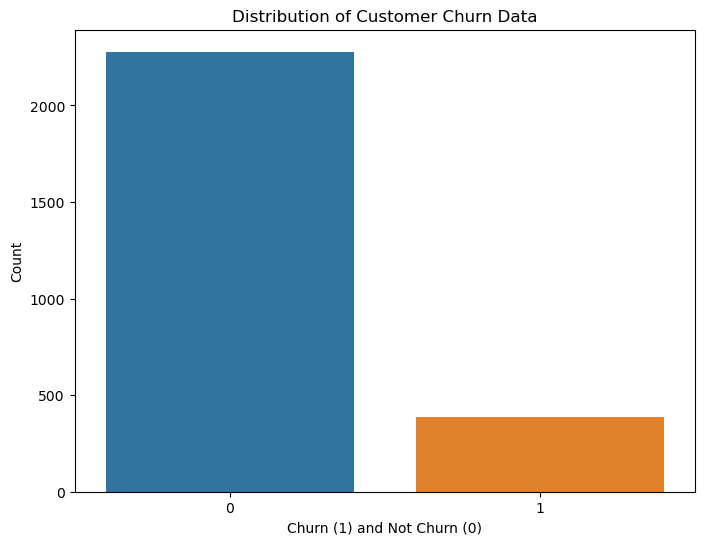

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Churn', data = df)
plt.title("Distribution of Customer Churn Data")
plt.ylabel("Count")
plt.xlabel("Churn (1) and Not Churn (0)")
plt.show()

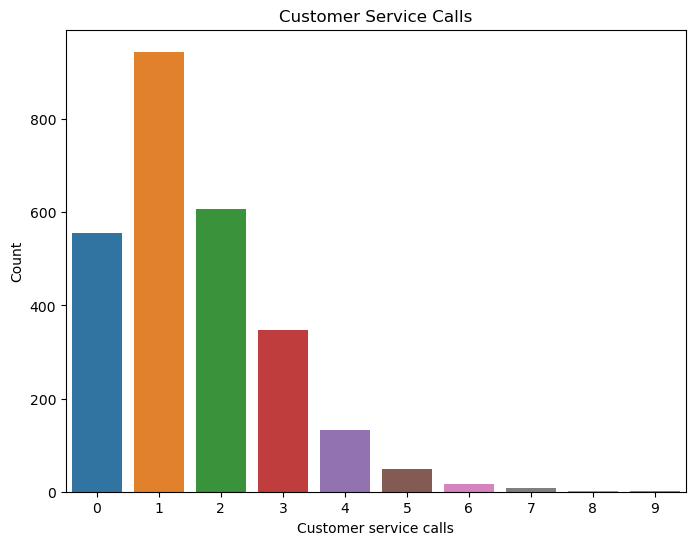

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x = df['Customer service calls'])
plt.title("Customer Service Calls")
plt.ylabel("Count")
plt.show()

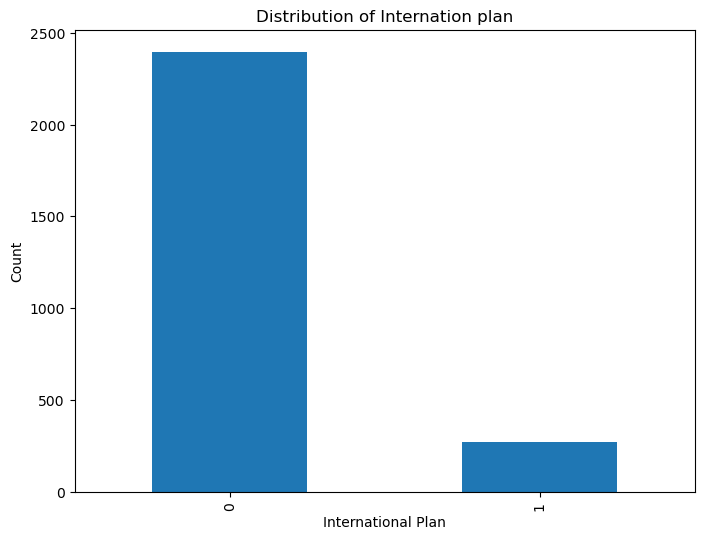

In [49]:
plt.figure(figsize=(8,6))
df['International plan'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Internation plan")
plt.ylabel("Count")
plt.xlabel("International Plan")
plt.show()

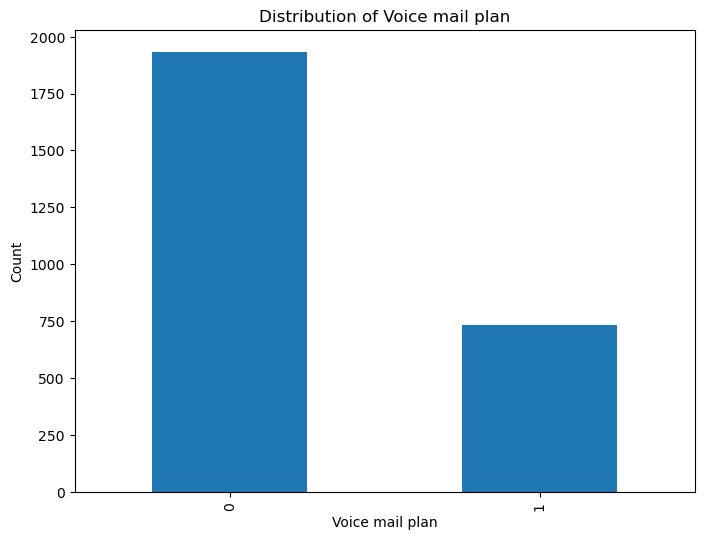

In [50]:
plt.figure(figsize=(8,6))
df['Voice mail plan'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Voice mail plan")
plt.ylabel("Count")
plt.xlabel("Voice mail plan")
plt.show()

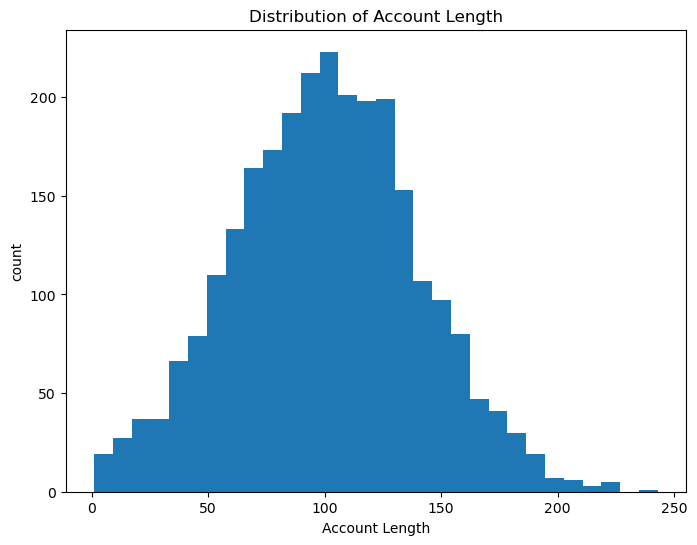

In [51]:
plt.figure(figsize = (8,6))
df['Account length'].plot(kind = 'hist', bins = 30)
plt.title("Distribution of Account Length")
plt.xlabel("Account Length")
plt.ylabel("count")
plt.show()

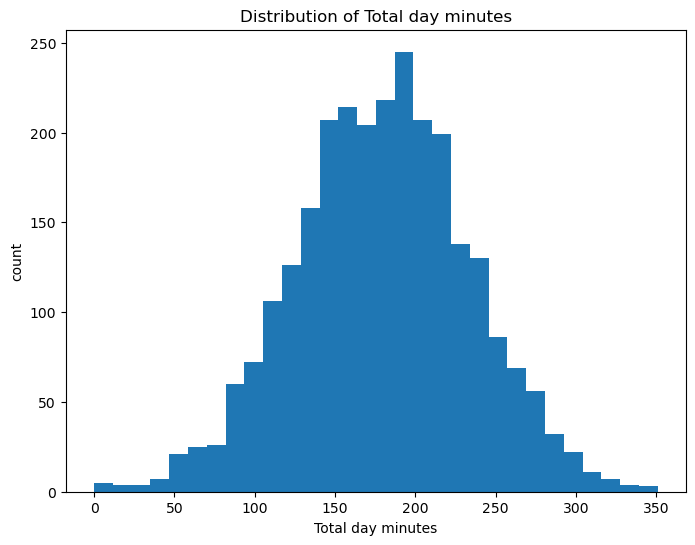

In [52]:
plt.figure(figsize = (8,6))
df['Total day minutes'].plot(kind = 'hist', bins = 30)
plt.title("Distribution of Total day minutes")
plt.xlabel("Total day minutes")
plt.ylabel("count")
plt.show()

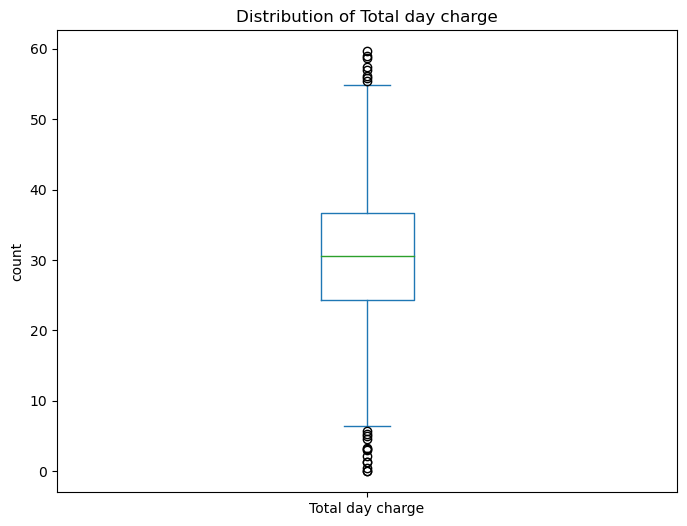

In [53]:
plt.figure(figsize = (8,6))
df['Total day charge'].plot(kind = 'box')
plt.title("Distribution of Total day charge")
plt.ylabel("count")
plt.show()

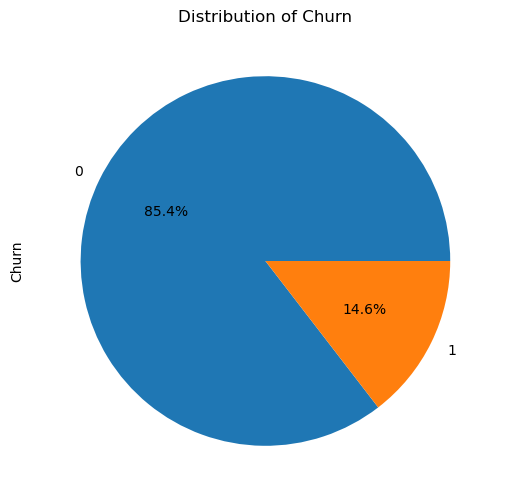

In [54]:
plt.figure(figsize = (8,6))
df['Churn'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Distribution of Churn")
plt.show()

In [107]:
# sns.pairplot(df, hue = "Churn")

# Spliting Testing and Traing Data

In [56]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Selecting & Training the Models and Evalution 

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
ran_for = RandomForestClassifier()
ran_for.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
ran_predict = ran_for.predict(x_test)

In [99]:
accuracy1 = accuracy_score(y_test, ran_predict)
precision = precision_score(y_test, ran_predict)
recall = recall_score(y_test, ran_predict)
f1 = f1_score(y_test, ran_predict)

In [100]:
result1 = pd.DataFrame({'Metric': ["Accuracy", "Precision", "Recall", "f1 Score"],
                        "value": [accuracy1, precision, recall, f1]})
print(result1)

      Metric     value
0   Accuracy  0.945693
1  Precision  0.962963
2     Recall  0.658228
3   f1 Score  0.781955


In [58]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\Ahtisham Ali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = log_reg.predict(x_test)

In [60]:
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
accuracy2 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [102]:
result2 = pd.DataFrame({'Metric': ["Accuracy", "Precision", "Recall", "f1 Score"],
                        "value": [accuracy2, precision, recall, f1]})

In [103]:
print(result2)

      Metric     value
0   Accuracy  0.852060
1  Precision  0.500000
2     Recall  0.101266
3   f1 Score  0.168421


In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[447,   8],
       [ 71,   8]], dtype=int64)

# Comparison Between Logistic Regression and Random forest Model

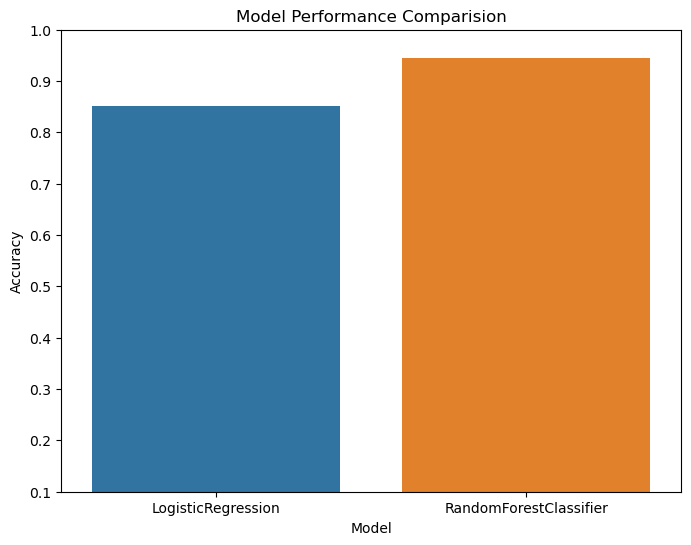

In [106]:
model_performance = pd.DataFrame({
    "Model": ['LogisticRegression', 'RandomForestClassifier'],
    "Accuracy": [accuracy2, accuracy1]})
plt.figure(figsize=(8,6))
sns.barplot(x = 'Model', y = "Accuracy", data = model_performance)
plt.title("Model Performance Comparision")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.1, 1.0)
plt.show()